In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
dataset_main_v1=pd.read_csv('css_main_training.csv',sep=';', error_bad_lines=False)
dataset_main_v1.shape

C:\Users\mehdi\anaconda3\envs\tf_V2\lib\site-packages\IPython\core\interactiveshell.py:3524: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(330055, 36)

In [3]:
dataset_main_v1


,id_contract,expenses,duty_count,refrigerated,id_payer,id_currency,direction,temperature,load_size_type,contract_type,...,km_empty,km_nonempty,train_km,prim_train_line,train_intervals,ferry_duration,prim_ferry_line,ferry_intervals,km_total,max_weight
0,6V17,7.080449,0,1,sdv,PLN,I,+2°C,F,FTL,...,0,993.0,0,NaN,0,0,NaN,0.0,993.0,22000.0
1,3dki,6.726245,0,0,v7o,EUR,I,NaN,F,GCA,...,0,885.0,0,NaN,0,0,NaN,0.0,885.0,4824.0
2,Kir3,7.307691,0,0,gOP,EUR,I,NaN,F,FTL,...,163,404.0,983,22.0,1,0,NaN,0.0,567.0,25000.0
3,551r,6.245743,0,0,9mo,PLN,I,NaN,C,GCA,...,0,943.0,0,NaN,0,0,NaN,0.0,943.0,903.0
4,D7D0,7.318926,0,0,gOP,EUR,I,NaN,F,FTL,...,163,404.0,983,22.0,1,0,NaN,0.0,567.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330050,hhw0,7.293152,0,0,AbF,EUR,I,NaN,F,FTL,...,22,486.0,983,22.0,1,0,NaN,0.0,508.0,24500.0
330051,k8pO,5.616801,0,1,goJ,PLN,D,-25,F,FTL,...,0,211.0,0,NaN,0,0,NaN,0.0,211.0,22000.0
330052,jNym,7.163418,0,0,f9N,PLN,I,NaN,F,GCA,...,0,870.0,0,NaN,0,0,NaN,0.0,870.0,24000.0
330053,BWyq,6.988138,0,0,kfz,PLN,I,NaN,F,FTL,...,97,237.0,983,22.0,1,0,NaN,0.0,334.0,24500.0


In [4]:
dataset_main_v1.describe()

,expenses,duty_count,refrigerated,euro_exchange_rate,id_service_type,first_load_lat,first_load_lon,last_unload_lat,last_unload_lon,route_start_lat,...,km_empty,km_nonempty,train_km,prim_train_line,train_intervals,ferry_duration,prim_ferry_line,ferry_intervals,km_total,max_weight
count,330055.000000,330055.000000,330055.000000,330055.000000,330012.00000,330055.000000,330055.000000,330055.000000,330055.000000,330055.000000,...,330055.000000,330055.000000,330055.000000,33506.000000,330055.000000,330055.000000,57764.000000,330047.000000,330055.000000,330055.000000
mean,6.373581,0.003542,0.106043,4.319881,26.09116,52.598053,17.056239,52.735084,16.097306,52.605596,...,46.655766,539.551802,106.631374,51.142064,0.112093,160.709445,310.044197,0.238615,586.207569,16210.342001
std,1.059339,0.059408,0.307893,0.091434,8.74662,2.362279,5.072066,2.646581,6.372079,2.371660,...,107.585996,495.815140,329.507620,96.672432,0.345234,430.256912,322.569225,0.554355,520.363388,8436.664190
min,2.879139,0.000000,0.000000,4.142300,23.00000,36.520000,-9.370000,37.079885,-9.271339,36.520000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,63.000000,0.000000,11.000000,10.000000
25%,5.824921,0.000000,0.000000,4.262200,23.00000,51.410000,17.009791,51.412892,15.842814,51.410000,...,0.000000,200.000000,0.000000,2.000000,0.000000,0.000000,75.000000,0.000000,238.000000,9494.000000
50%,6.388599,0.000000,0.000000,4.300000,23.00000,51.954352,18.650115,52.231756,18.590000,51.974031,...,0.000000,387.000000,0.000000,3.000000,0.000000,0.000000,110.000000,0.000000,435.000000,20000.000000
75%,7.254999,0.000000,0.000000,4.373400,25.00000,53.720465,19.583700,54.169459,19.603697,53.720465,...,19.000000,781.000000,0.000000,22.000000,0.000000,0.000000,679.000000,0.000000,853.000000,23000.000000
max,9.598065,1.000000,1.000000,4.633000,104.00000,66.770000,34.930000,69.727148,35.120000,67.850338,...,3457.000000,5438.000000,3922.000000,331.000000,4.000000,5940.000000,2486.000000,4.000000,5438.000000,199950.000000


In [5]:
dataset_main_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330055 entries, 0 to 330054
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_contract           330055 non-null  object 
 1   expenses              330055 non-null  float64
 2   duty_count            330055 non-null  int64  
 3   refrigerated          330055 non-null  int64  
 4   id_payer              330055 non-null  object 
 5   id_currency           330055 non-null  object 
 6   direction             330055 non-null  object 
 7   temperature           35125 non-null   object 
 8   load_size_type        330055 non-null  object 
 9   contract_type         330055 non-null  object 
 10  euro_exchange_rate    330055 non-null  float64
 11  id_service_type       330012 non-null  float64
 12  first_load_lat        330055 non-null  float64
 13  first_load_lon        330055 non-null  float64
 14  last_unload_lat       330055 non-null  float64
 15  

In [6]:
dataset_main_v1.isna().sum(axis=0)

id_contract                  0
expenses                     0
duty_count                   0
refrigerated                 0
id_payer                     0
id_currency                  0
direction                    0
temperature             294930
load_size_type               0
contract_type                0
euro_exchange_rate           0
id_service_type             43
first_load_lat               0
first_load_lon               0
last_unload_lat              0
last_unload_lon              0
route_start_lat              0
route_start_lon              0
route_end_lat                0
route_end_lon                0
first_load_country        1926
last_unload_country       1152
route_start_country       1890
route_end_country          579
route_start_datetime         0
route_end_datetime           0
km_empty                     0
km_nonempty                  0
train_km                     0
prim_train_line         296549
train_intervals              0
ferry_duration               0
prim_fer

In [7]:
dataset2=pd.read_csv('css_routes_training.csv',sep=';', error_bad_lines=False)
dataset2.shape

C:\Users\mehdi\anaconda3\envs\tf_V2\lib\site-packages\IPython\core\interactiveshell.py:3524: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(1189654, 60)

In [8]:
dataset2

,id_contract,id_contractor,id_vehicle,id_trailer,step,step_type,if_empty,external_fleet,kg_load_unload,kg_current,...,trailer_payload_pallets,trailer_payload_m3,trailer_cargo_hold_height,trailer_cargo_hold_width,trailer_cargo_hold_length,trailer_generator,trailer_length,trailer_width,trailer_heigth,id_trailer_type
0,6V17,1.0,0,0,1,P,1,1,22000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6V17,1.0,0,0,2,K,0,1,-22000.0,22000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3dki,1.0,0,0,1,P,1,1,4824.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3dki,1.0,0,0,2,K,0,1,-4824.0,4824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kir3,0.0,1,1,1,D,1,0,0.0,0.0,...,33.0,92.0,2.7,2.48,13.6,N,13.6,2.48,2.7,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189649,BWyq,1.0,1,1,6,B,0,1,0.0,24500.0,...,33.0,92.0,2.7,2.48,13.6,N,13.6,2.48,2.7,216.0
1189650,BWyq,1.0,1,1,7,K,0,1,-24500.0,24500.0,...,33.0,92.0,2.7,2.48,13.6,N,13.6,2.48,2.7,216.0
1189651,jlIy,1.0,0,0,1,P,1,1,10000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189652,jlIy,1.0,0,0,2,P,0,1,10000.0,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189654 entries, 0 to 1189653
Data columns (total 60 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id_contract                1189654 non-null  object 
 1   id_contractor              978492 non-null   float64
 2   id_vehicle                 1189654 non-null  int64  
 3   id_trailer                 1189654 non-null  int64  
 4   step                       1189654 non-null  int64  
 5   step_type                  1189654 non-null  object 
 6   if_empty                   1189654 non-null  int64  
 7   external_fleet             1189654 non-null  int64  
 8   kg_load_unload             1189654 non-null  float64
 9   kg_current                 1189654 non-null  float64
 10  ferry                      1189654 non-null  int64  
 11  ferry_duration             1189641 non-null  float64
 12  ferry_line                 154281 non-null   float64
 13  train       

In [10]:
dataset2.isna().sum(axis=0)

id_contract                        0
id_contractor                 211162
id_vehicle                         0
id_trailer                         0
step                               0
step_type                          0
if_empty                           0
external_fleet                     0
kg_load_unload                     0
kg_current                         0
ferry                              0
ferry_duration                    13
ferry_line                   1035373
train                              0
train_km                           0
train_line                   1086969
tail_init                          0
tail_fin                           0
tail                               0
latitude                           0
longitude                          0
city                               0
address                            0
country_code                    3989
estimated_time                     0
km                                 0
km_nonempty                        0
k

In [11]:
merged_dataset=pd.merge(dataset1, dataset2, on='id_contract')

NameError: name 'dataset1' is not defined

In [ ]:
merged_dataset.shape

In [ ]:
merged_dataset

<AxesSubplot:>

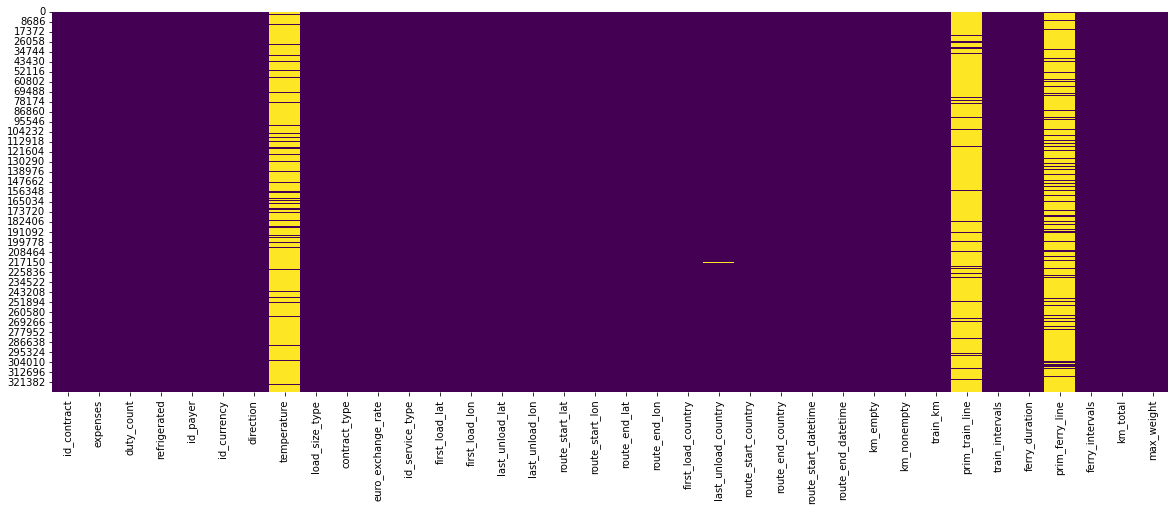

In [12]:
plt.figure(figsize=(20, 7))
sns.heatmap(dataset_main_v1.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

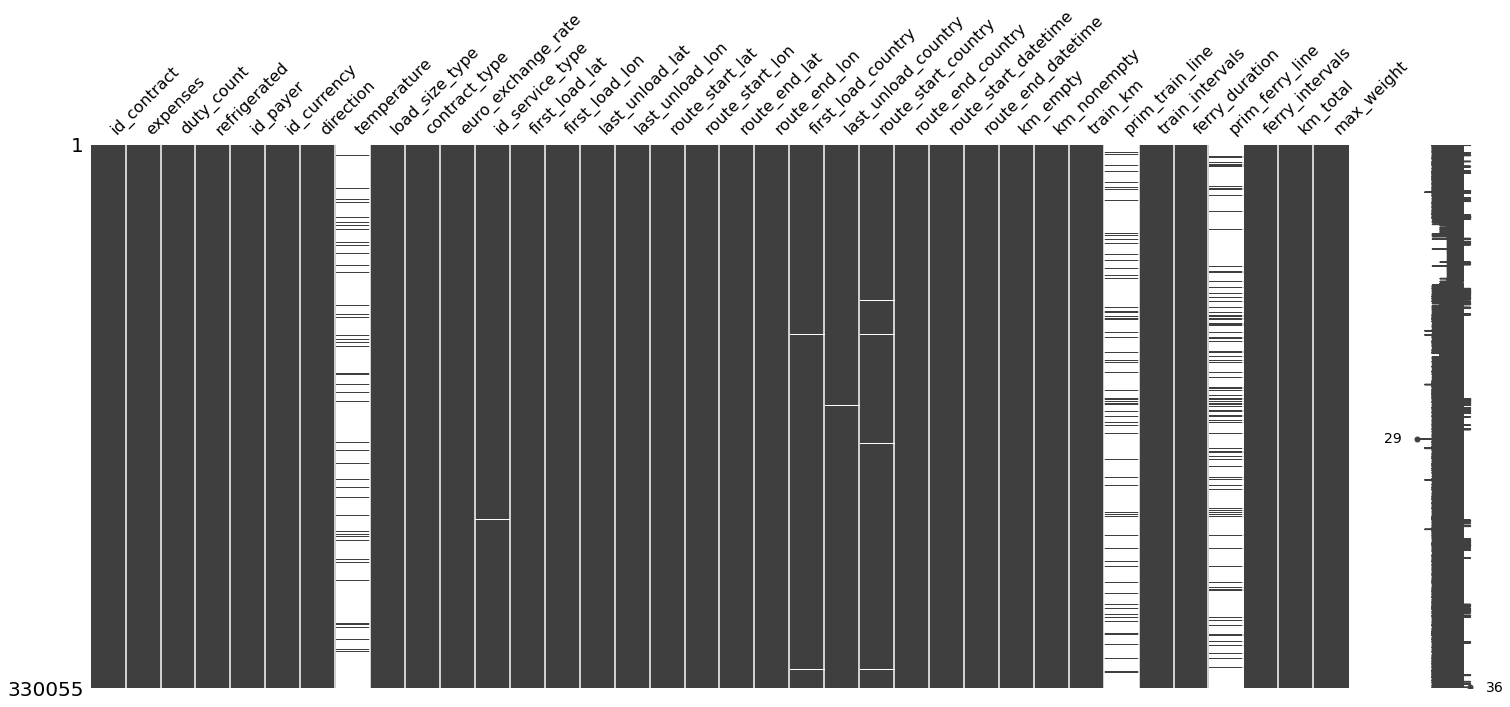

In [13]:
msno.matrix(dataset_main_v1)

<AxesSubplot:>

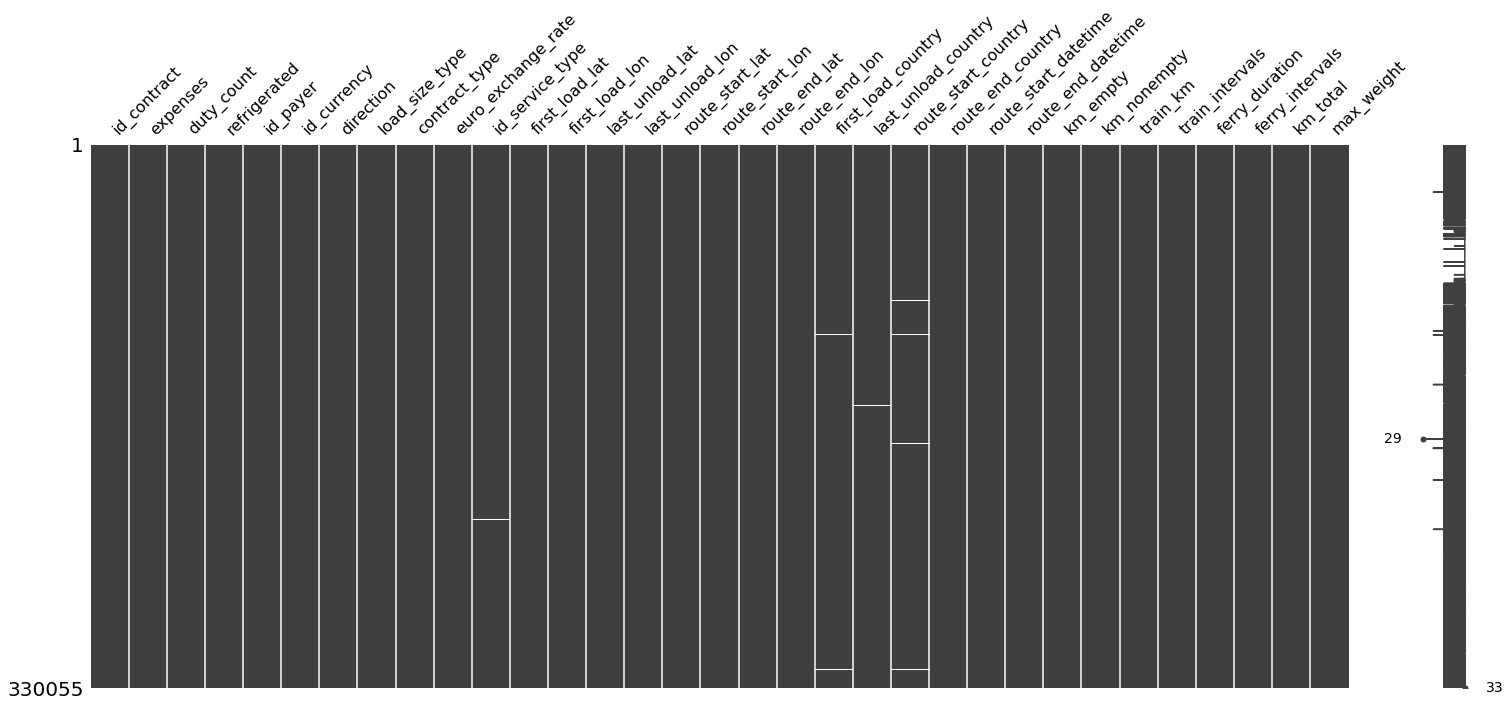

In [14]:
#drop columns containing a lot of missing values
dataset_main_v2=dataset_main_v1.drop(columns=['temperature','prim_train_line','prim_ferry_line'])
msno.matrix(dataset_main_v2)

In [15]:
#the max od missing values by row 
max(dataset_main_v2.isna().sum(axis=1))

4

In [32]:
#there are 1996 rows that have more than 1 missing value 
dataset_main_v2.loc[dataset_main_v2.isna().sum(axis=1)>0].shape

(51, 33)

In [33]:
dataset_main_v3=dataset_main_v2.drop(dataset_main_v2.loc[dataset_main_v2.isna().sum(axis=1)>0].index)
dataset_main_v3.loc[dataset_main_v2.isna().sum(axis=1)>0].shape

(0, 33)

<AxesSubplot:>

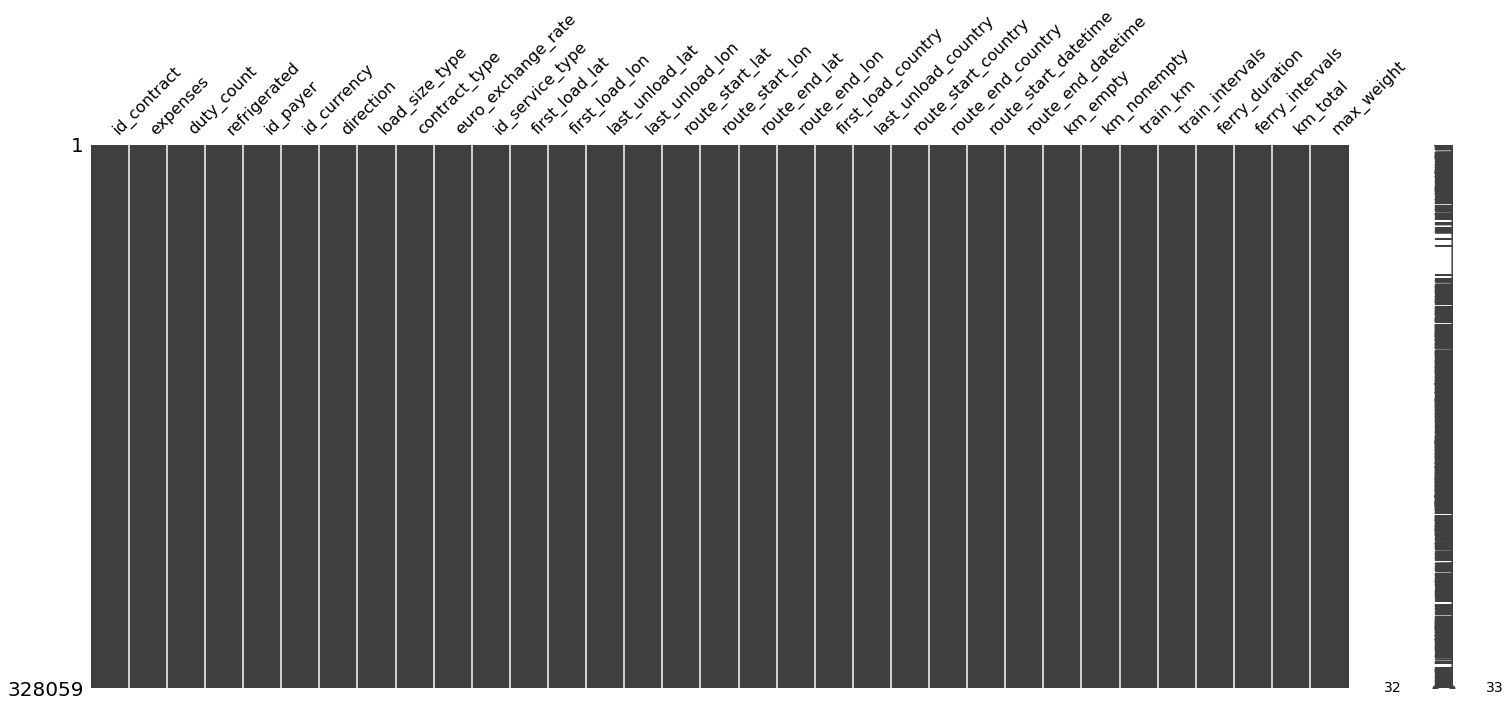

In [18]:
msno.matrix(dataset_main_v3)

In [34]:
dataset_main_v3.isna().sum(axis=0)

expenses                0
duty_count              0
refrigerated            0
euro_exchange_rate      0
id_service_type         0
first_load_lat          0
first_load_lon          0
last_unload_lat         0
last_unload_lon         0
route_start_lat         0
route_start_lon         0
route_end_lat           0
route_end_lon           0
km_empty                0
km_nonempty             0
train_km                0
train_intervals         0
ferry_duration          0
ferry_intervals         0
km_total                0
max_weight              0
id_contract             0
id_payer                0
id_currency             0
direction               0
load_size_type          0
contract_type           0
first_load_country      0
last_unload_country     0
route_start_country     0
route_end_country       0
route_start_datetime    0
route_end_datetime      0
dtype: int64

In [20]:
dataset_main_v2.head()

,id_contract,expenses,duty_count,refrigerated,id_payer,id_currency,direction,load_size_type,contract_type,euro_exchange_rate,...,route_start_datetime,route_end_datetime,km_empty,km_nonempty,train_km,train_intervals,ferry_duration,ferry_intervals,km_total,max_weight
0,6V17,7.080449,0,1,sdv,PLN,I,F,FTL,4.2442,...,2019-07-02 15:00:00,2019-07-04 06:00:00,0,993.0,0,0,0,0.0,993.0,22000.0
1,3dki,6.726245,0,0,v7o,EUR,I,F,GCA,4.2457,...,2019-07-02 08:00:00,2019-07-03 10:45:00,0,885.0,0,0,0,0.0,885.0,4824.0
2,Kir3,7.307691,0,0,gOP,EUR,I,F,FTL,4.2445,...,2019-07-03 13:30:00,2019-07-09 05:19:00,163,404.0,983,1,0,0.0,567.0,25000.0
3,551r,6.245743,0,0,9mo,PLN,I,C,GCA,4.2442,...,2019-07-02 08:00:00,2019-07-03 08:00:00,0,943.0,0,0,0,0.0,943.0,903.0
4,D7D0,7.318926,0,0,gOP,EUR,I,F,FTL,4.2519,...,2019-07-03 12:00:00,2019-07-09 06:00:00,163,404.0,983,1,0,0.0,567.0,25000.0


<function matplotlib.pyplot.show(close=None, block=None)>

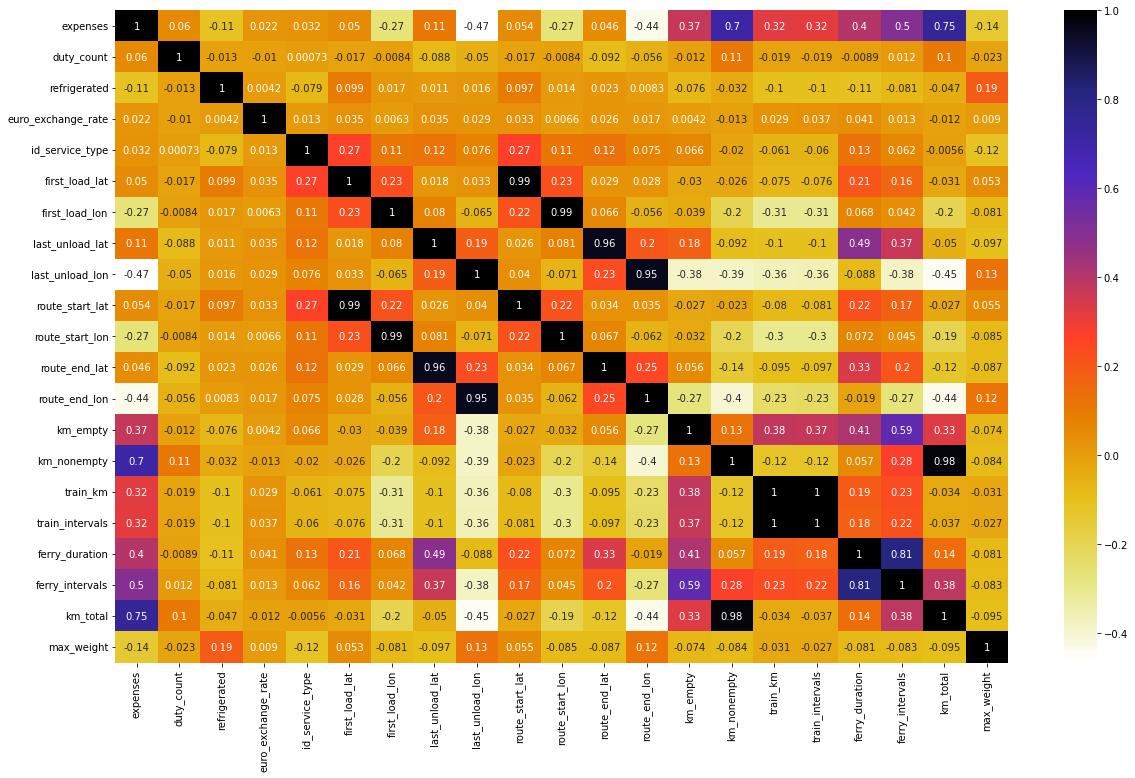

In [21]:
plt.figure(figsize=(20,12))
cor_dataset_main_v2=dataset_main_v2.corr()
sns.heatmap(cor_dataset_main_v2,annot=True, cmap=plt.cm.CMRmap_r)
plt.show

In [22]:
cat_columns=dataset_main_v2.select_dtypes(include=['object']).columns.tolist()

In [23]:
from sklearn.preprocessing import LabelEncoder 
#creating instance of labelEncoder
encoder=LabelEncoder()
dataset_main_v3=dataset_main_v2
for cat in cat_columns:
    #encoding the given categorical column
    en=encoder.fit_transform(dataset_main_v3[cat])
    #drop the ancien column and replace it with the encoded column
    dataset_main_v3.drop(cat, axis=1, inplace=True)
    dataset_main_v3[cat]=en
dataset_main_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330055 entries, 0 to 330054
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   expenses              330055 non-null  float64
 1   duty_count            330055 non-null  int64  
 2   refrigerated          330055 non-null  int64  
 3   euro_exchange_rate    330055 non-null  float64
 4   id_service_type       330012 non-null  float64
 5   first_load_lat        330055 non-null  float64
 6   first_load_lon        330055 non-null  float64
 7   last_unload_lat       330055 non-null  float64
 8   last_unload_lon       330055 non-null  float64
 9   route_start_lat       330055 non-null  float64
 10  route_start_lon       330055 non-null  float64
 11  route_end_lat         330055 non-null  float64
 12  route_end_lon         330055 non-null  float64
 13  km_empty              330055 non-null  int64  
 14  km_nonempty           330055 non-null  float64
 15  

<function matplotlib.pyplot.show(close=None, block=None)>

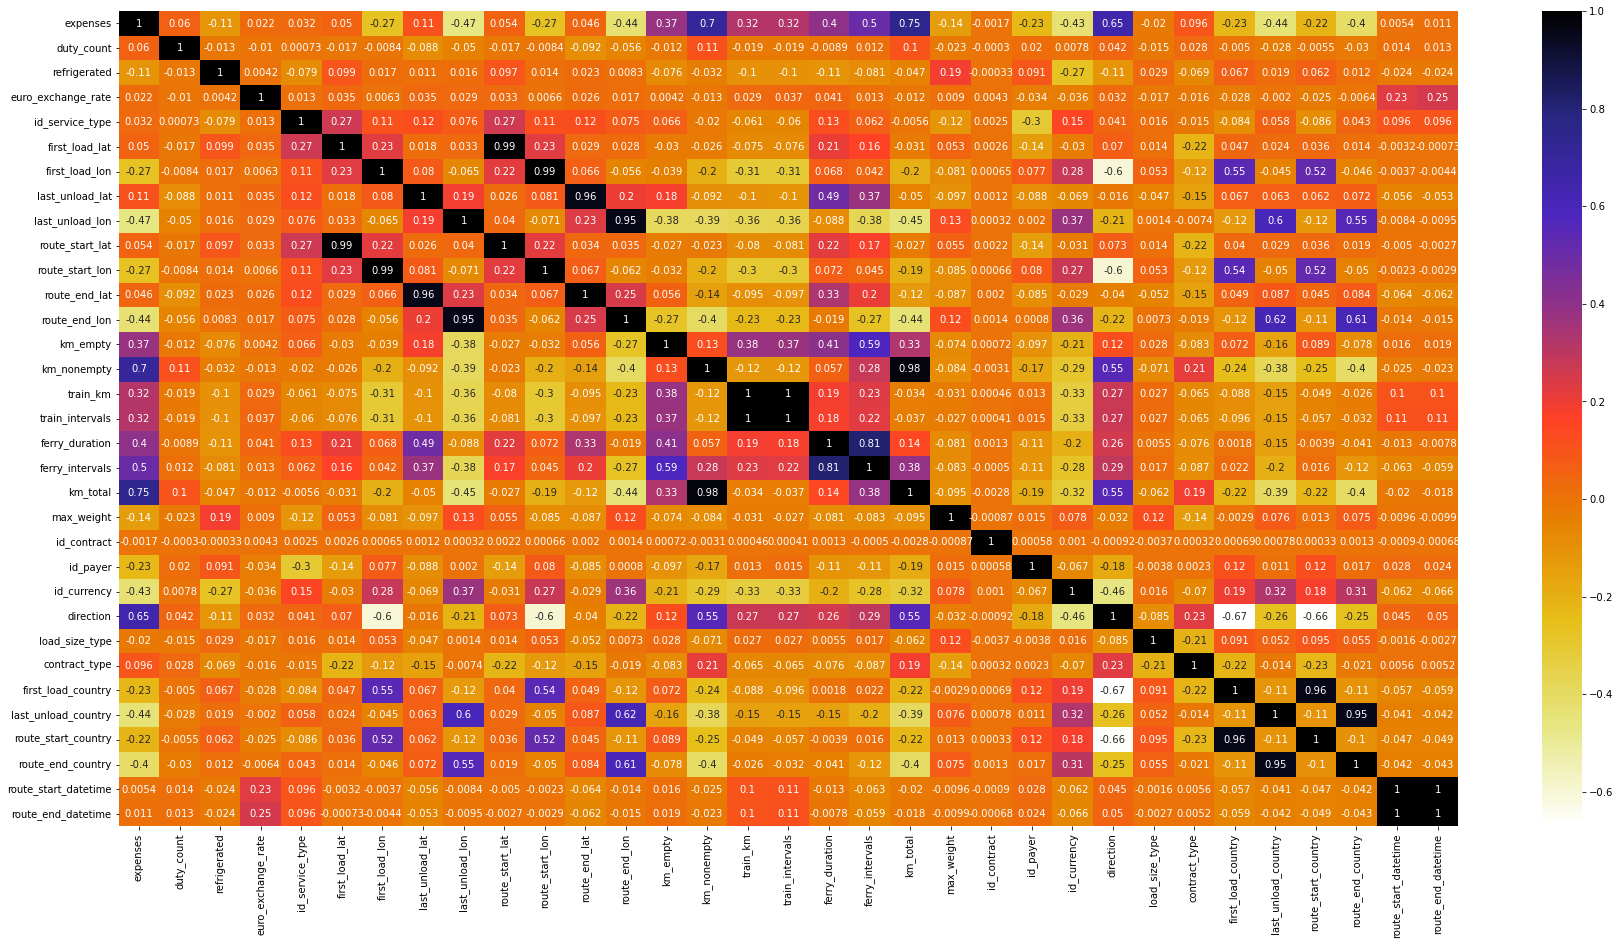

In [24]:
plt.figure(figsize=(30,15))
cor_dataset_main_v3=dataset_main_v3.corr()
sns.heatmap(cor_dataset_main_v3,annot=True, cmap=plt.cm.CMRmap_r)
plt.show

In [25]:
from sklearn.preprocessing import LabelEncoder, 
encoder=LabelEncoder()
encoder.fit_transform(dataset_main_v3.select_dtypes(include=['object']))

SyntaxError: trailing comma not allowed without surrounding parentheses (CreatorTemp/ipykernel_1380/2632900497.py, line 1)

In [26]:
dataset_main_v2[['ferry_intervals','ferry_duration']].describe()

,ferry_intervals,ferry_duration
count,330047.000000,330055.000000
mean,0.238615,160.709445
std,0.554355,430.256912
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4.000000,5940.000000


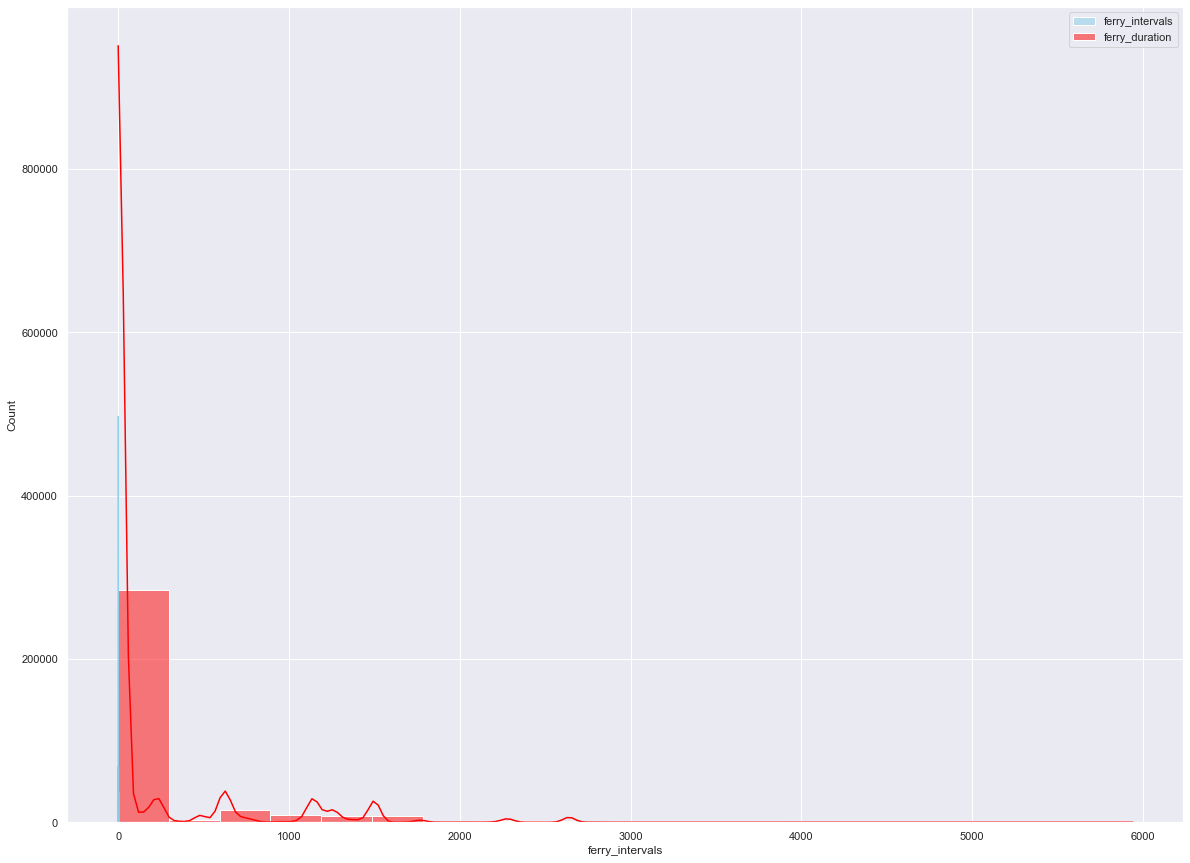

In [27]:
sns.set(style="darkgrid")
df = dataset_main_v2
plt.figure(figsize=(20,15))

sns.histplot(data=df, x="ferry_intervals", color="skyblue", label="ferry_intervals", kde=True)
sns.histplot(data=df, x="ferry_duration", color="red", label="ferry_duration", kde=True)
plt.legend() 





plt.show()

In [37]:
dataset_main_v4=dataset_main_v3.drop(columns=['expenses'])


In [42]:
#PCA 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset_main_v4_scaled=scaler.fit_transform(dataset_main_v4)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.99)
dataset_main_v4_reduced=pca.fit_transform(dataset_main_v4_scaled)


In [50]:
print(f"dimension before reduction is {dataset_main_v4_scaled.shape}")
print(f"dimension after reduction is {dataset_main_v4_reduced.shape}")

dimension before reduction is (330004, 32)
dimension after reduction is (330004, 22)


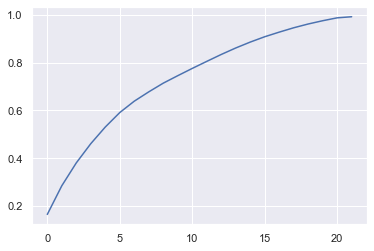

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))